In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pyccl

cosmo = pyccl.CosmologyVanillaLCDM()
mass_def = pyccl.halos.massdef.MassDef('vir', rho_type='matter')
concentration = pyccl.halos.concentration.duffy08.ConcentrationDuffy08(mass_def=mass_def)
halo_bias =  pyccl.halos.hbias.tinker10.HaloBiasTinker10(mass_def=mass_def)
hmf = pyccl.halos.hmfunc.tinker08.MassFuncTinker08(mass_def=mass_def)

NFW_profile = pyccl.halos.profiles.nfw.HaloProfileNFW(mass_def=mass_def, concentration=concentration)
HOD_profile =  pyccl.halos.profiles.hod.HaloProfileHOD(mass_def=mass_def, concentration=concentration, is_number_counts=True)
HOD_profile_false =  pyccl.halos.profiles.hod.HaloProfileHOD(mass_def=mass_def, concentration=concentration, is_number_counts=False)

hmc = pyccl.halos.halo_model.HMCalculator(mass_function=hmf, halo_bias=halo_bias, mass_def=mass_def)
prof_2pt = pyccl.halos.profiles_2pt.Profile2ptHOD()

z_max = 0.2
na = pyccl.ccllib.get_pk_spline_na(cosmo.cosmo)
a_arr, _ = pyccl.ccllib.get_pk_spline_a(cosmo.cosmo, na, 0)
# Cut the array for efficiency
sel = 1 / a_arr < z_max + 1
# Include the next node so that z_max is in the range
sel[np.sum(~sel) - 1] = True
a_arr = a_arr[sel]

lk_arr = cosmo.get_pk_spline_lk()

tkk_nfw = pyccl.halos.pk_4pt.halomod_trispectrum_1h(cosmo, hmc, np.exp(lk_arr), a_arr, prof=NFW_profile)
tkk_hod_nc = pyccl.halos.pk_4pt.halomod_trispectrum_1h(cosmo, hmc, np.exp(lk_arr), a_arr, prof=HOD_profile, prof12_2pt=prof_2pt, prof34_2pt=prof_2pt)
tkk_hod_no_nc = pyccl.halos.pk_4pt.halomod_trispectrum_1h(cosmo, hmc, np.exp(lk_arr), a_arr, prof=HOD_profile_false, prof12_2pt=prof_2pt, prof34_2pt=prof_2pt)
tkk_hod_no_nc_no2pthod = pyccl.halos.pk_4pt.halomod_trispectrum_1h(cosmo, hmc, np.exp(lk_arr), a_arr, prof=HOD_profile_false)




<Figure size 1000x1000 with 0 Axes>

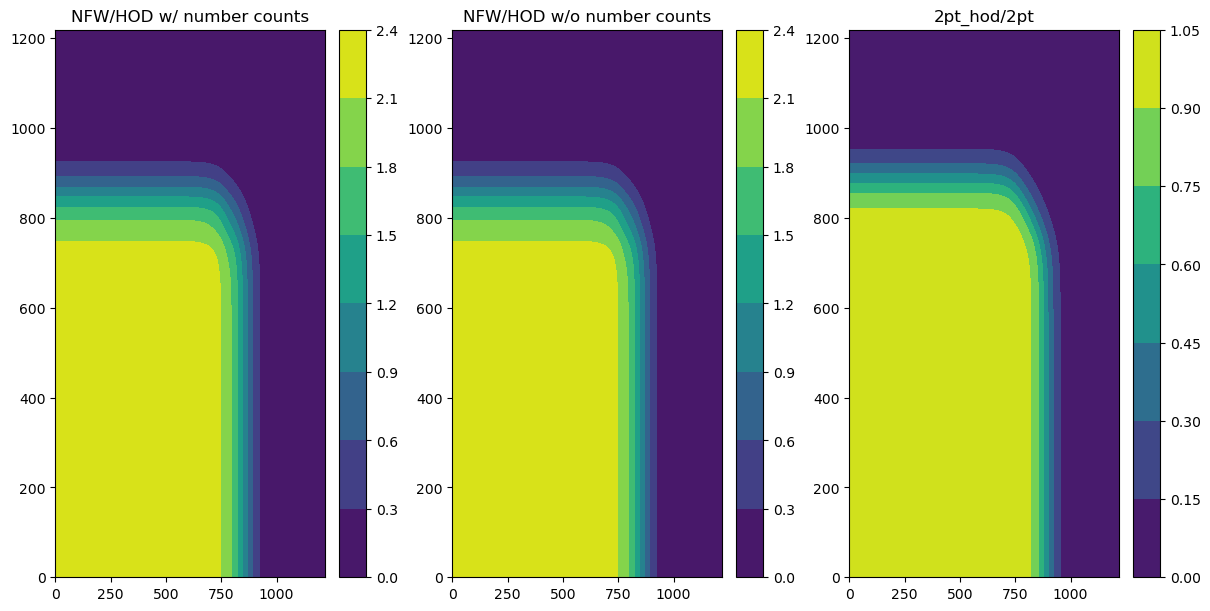

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), constrained_layout=True)
ctrf = axs[0].contourf(tkk_nfw[0]/tkk_hod_nc[0])
cbar = fig.colorbar(ctrf, ax=axs[0])
ctrf = axs[1].contourf(tkk_nfw[0]/tkk_hod_no_nc[0])
cbar = fig.colorbar(ctrf, ax=axs[1])
ctrf = axs[2].contourf(tkk_hod_no_nc[0]/tkk_hod_no_nc_no2pthod[0])
cbar = fig.colorbar(ctrf, ax=axs[2])
axs[0].set_title("NFW/HOD w/ number counts")
axs[1].set_title("NFW/HOD w/o number counts")
axs[2].set_title("2pt_hod/2pt")
#print(tkk_hod_no_nc_no2pthod[0]/tkk_hod_no_nc[0])
plt.show()

[[1.00223502e+00 1.00223502e+00 1.00223502e+00 ... 7.92927257e+03
  8.14150586e+03 8.36389810e+03]
 [1.00223502e+00 1.00223502e+00 1.00223502e+00 ... 7.92927257e+03
  8.14150586e+03 8.36389810e+03]
 [1.00223502e+00 1.00223502e+00 1.00223502e+00 ... 7.92927257e+03
  8.14150586e+03 8.36389810e+03]
 ...
 [7.92927257e+03 7.92927257e+03 7.92927257e+03 ... 1.46979173e+08
  1.50845442e+08 1.54941619e+08]
 [8.14150586e+03 8.14150586e+03 8.14150586e+03 ... 1.50845442e+08
  1.54764729e+08 1.58984428e+08]
 [8.36389810e+03 8.36389810e+03 8.36389810e+03 ... 1.54941619e+08
  1.58984428e+08 1.63261414e+08]]


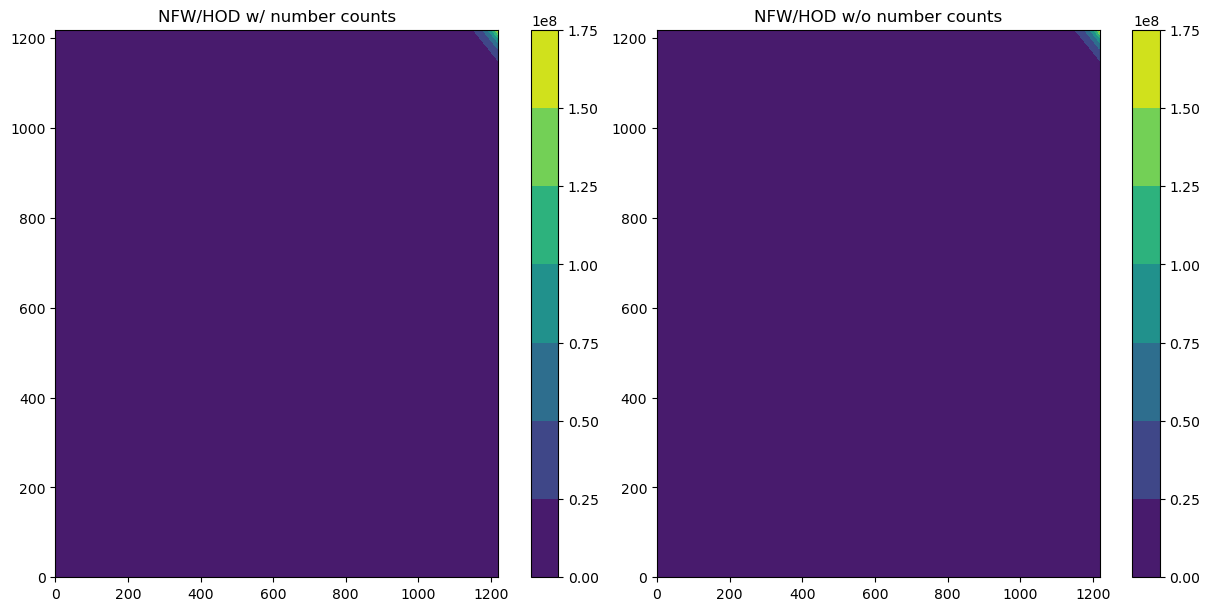

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)
ctrf = axs[0].contourf(tkk_hod_no_nc_no2pthod[0]/tkk_hod_nc[0])
cbar = fig.colorbar(ctrf, ax=axs[0])
ctrf = axs[1].contourf(tkk_hod_no_nc_no2pthod[0]/tkk_hod_no_nc[0])
cbar = fig.colorbar(ctrf, ax=axs[1])
#ctrf = axs[2].contourf(tkk_hod_nc[0]/tkk_hod_no_nc[0])
#cbar = fig.colorbar(ctrf, ax=axs[2])
axs[0].set_title("NFW/HOD w/ number counts")
axs[1].set_title("NFW/HOD w/o number counts")
#axs[2].set_title("HOD w/ number counts/HOD w/o number counts")
print(tkk_hod_no_nc_no2pthod[0]/tkk_hod_no_nc[0])
plt.show()